# Sentiment Analysis
*Jannik Labs, 2023*
*Master "Applied Data Science" @ Nordakademie*
*Modul: Text Analytics*

## Intro

Different approaches/methods or respective libraries possible for mapping sentiment values to the "cleaned_articles_v1.csv". Each coming in with its own characteristics, weaknesses and strengths:

1. **TextBlob**
- beginner-friendly and relatively easy to set up
- pre-trained models for sentiment analysis
- suitable for basic sentiment analysis tasks
- limited customization options

2. **NLTK Toolkit** - in general
- wide range of tools for text processing, including sentiment analysis
- more flexibility for creating custom sentiment analysis models

**VADER**-- (**V**alence **A**ware **D**ictionary and s**E**ntiment **R**easoner) (PART OF NLTK)
- specific for Social Media, especially for informal texts like tweets and social media posts
- lexicon-based and comes with a pre-trained sentiment lexicon
- good for real-time sentiment analysis

3. **Scikit-learn**
- can be used to build a custom sentiment analysis model using machine learning
- allows engineering of custom features for sentiment analysis

4. **Transformer Models like BERT or GPT**
- State-of-the-Art Models: Utilizes pre-trained transformer-based models (e.g., BERT, GPT) for sentiment analysis
- High Performance: Provides state-of-the-art performance in NLP tasks
- requires significant computational resources and large amounts of data

### Decision
For our use case custom sentiment models with special features are rather out of scope. Neither do we mainly analyse really short texts as found on Social Media (tweets on X etc.). Therefore, in order to ensure comparisons of different tools/libraries, here we will use:

- TextBlob
- NLTK Toolkit (using VADER) (still used for a comparison)
- BERT

As ressource heaviness increases these tools will be used in this exact order.

## Sentiment Analyses

### General pre-work

In [290]:
# Import necessary libraries

# Overall needed
import pandas as pd # to work with data frames
import numpy as np

# Needed for sentiment analyses and different approaches
from textblob import TextBlob
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Needed for visualisations and smaller functions such as time tracking or saving files
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import os # to define a dedicated output folder
import time # to track the run time for different approaches
import random

output_folder = 'data/sentiment_results' # refer to a new folder to store only sentiment result files

# check if folder can be found, else create it
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jannik.labs\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [291]:
# Load the CSV file from the data cleaning part

csv_file_path = 'data/transfer/cleaned_articles_v1.csv' # define the path of the input csv file

# Load the data set, with the option of defining only a subset of the data (first x rows as an example). This way we can test ALL our approaches first and see some first results. Just use parameter "nrows=x". Total row number of the input is around 23.500.
df = pd.read_csv(csv_file_path, encoding='utf-8', quoting=csv.QUOTE_ALL) # ensuring the right encoding as in the csv file we still encounter incorrectly encoded special characters
total_rows = len(df) #define total rows

# Create separate data frame copies for the sentiment analysis approaches
df_textblob = df.copy()  # For TextBlob approach
df_nltk = df.copy()      # For NLTK approach
df_bert = df.copy()      # for BERT approach

### 1st Approach with TextBlob

In [292]:
used_approach = "TextBlob"  # Setting it for later reference

# Initialize a counter for tracking progress
current_row = 0

# Record the start time
start_time = time.time()

# Defining function for sentiment analysis
def analyze_sentiment(text):
    global current_row
    current_row += 1
    print(f"Analyzing text number {current_row} out of {total_rows} rows in the input file.")

    analysis = TextBlob(text)
    sentiment_score = analysis.sentiment.polarity
    if sentiment_score > 0:
        sentiment_label = 'Positive'
    elif sentiment_score == 0:
        sentiment_label = 'Neutral'
    else:
        sentiment_label = 'Negative'

    return sentiment_label, sentiment_score  # Return both label and score

# Applying the defined sentiment analysis function
df_textblob[['TextBlob_Sentiment_Label', 'TextBlob_Sentiment_Score']] = df_textblob['Cleaned_Text'].apply(analyze_sentiment).apply(pd.Series)

# Calculate and print the elapsed time
end_time = time.time()
elapsed_time = end_time - start_time

print("-"*100)

Analyzing text number 1 out of 23451 rows in the input file.
Analyzing text number 2 out of 23451 rows in the input file.
Analyzing text number 3 out of 23451 rows in the input file.
Analyzing text number 4 out of 23451 rows in the input file.
Analyzing text number 5 out of 23451 rows in the input file.
Analyzing text number 6 out of 23451 rows in the input file.
Analyzing text number 7 out of 23451 rows in the input file.
Analyzing text number 8 out of 23451 rows in the input file.
Analyzing text number 9 out of 23451 rows in the input file.
Analyzing text number 10 out of 23451 rows in the input file.
Analyzing text number 11 out of 23451 rows in the input file.
Analyzing text number 12 out of 23451 rows in the input file.
Analyzing text number 13 out of 23451 rows in the input file.
Analyzing text number 14 out of 23451 rows in the input file.
Analyzing text number 15 out of 23451 rows in the input file.
Analyzing text number 16 out of 23451 rows in the input file.
Analyzing text nu

In [293]:
# End information about the run
print(f"The used approach #1 was {used_approach}.")
print(f"Elapsed time: {elapsed_time:.0f} seconds.")

The used approach #1 was TextBlob.
Elapsed time: 23 seconds.


In [294]:
# Saving the output in two file formats in dedicated files for only this current approach in the correct repository folder

# Save the results to an Excel file
excel_output_file_textblob = os.path.join(output_folder, 'sentiment_results_textblob.xlsx')
df_textblob.to_excel(excel_output_file_textblob, index=False)

# Save the results to a csv file with the same name
csv_output_file_textblob = os.path.join(output_folder, 'sentiment_results_textblob.csv')
df_textblob.to_csv(csv_output_file_textblob, index=False, encoding='utf-8', quoting=csv.QUOTE_ALL)

# Print final info
print(f"Results saved as {csv_output_file_textblob} and {excel_output_file_textblob}.")

Results saved as data/sentiment_results\sentiment_results_textblob.csv and data/sentiment_results\sentiment_results_textblob.xlsx.


### Explorative Analysis of TextBlob

In [295]:
# Calculate and print statistics

print("Statistics for TextBlob_Sentiment_Score:")

print("\nAverage Score:")
print(df_textblob['TextBlob_Sentiment_Score'].mean())
print("\nMinimum Score:")
print(df_textblob['TextBlob_Sentiment_Score'].min())
print("\nMaximum Score:")
print(df_textblob['TextBlob_Sentiment_Score'].max())
print("\nStandard Deviation:")
print(df_textblob['TextBlob_Sentiment_Score'].std())

# statistics for 'TextBlob_Sentiment_Label'
print("\nStatistics for TextBlob_Sentiment_Label:")
print("Count of values:")
print(df_textblob['TextBlob_Sentiment_Label'].value_counts())

Statistics for TextBlob_Sentiment_Score:

Average Score:
0.007406103718853217

Minimum Score:
-1.0

Maximum Score:
1.0

Standard Deviation:
0.1526752999374119

Statistics for TextBlob_Sentiment_Label:
Count of values:
Negative    8558
Neutral     8247
Positive    6646
Name: TextBlob_Sentiment_Label, dtype: int64


In [296]:
# Check some results of TextBlob including all columns

# Randomly sample 5 positive entries
positive_entries = df_textblob[df_textblob['TextBlob_Sentiment_Score'] > 0].sample(5, random_state=42)

# Randomly sample 5 negative entries
negative_entries = df_textblob[df_textblob['TextBlob_Sentiment_Score'] < 0].sample(5, random_state=42)

# Concatenate the positive and negative entries along with all columns
sampled_entries = pd.concat([positive_entries, negative_entries])

# Display all columns for the sampled entries
print(sampled_entries)

                Unternehmen       Newstyp         Quelle Nearest_Date  \
9857          Hannover Rück  Marktbericht        dpa-AFX   2022-09-08   
20530                  E.ON  Marktbericht        dpa-AFX   2023-06-30   
17971      Volkswagen (Vz.)  Marktbericht        dpa-AFX   2023-04-21   
18553                  BASF          News  Aktienwelt360   2023-05-04   
21852                  E.ON  Marktbericht        dpa-AFX   2023-08-04   
16167               Vonovia  Marktbericht        dpa-AFX   2023-03-07   
17731        Siemens Energy          News        dpa-AFX   2023-04-14   
2656         Siemens Energy  Marktbericht        dpa-AFX   2022-02-09   
11733      Deutsche Telekom  Marktbericht        dpa-AFX   2022-10-28   
15439  Siemens Healthineers  Marktbericht        onvista   2023-02-15   

                                            Cleaned_Text    Stock_Value  \
9857   Aktie Frankfurt Zurückhaltung Ezbzinsentscheid...            NaN   
20530  Jahr Dax Schaufenster deutsch Wirtschaf

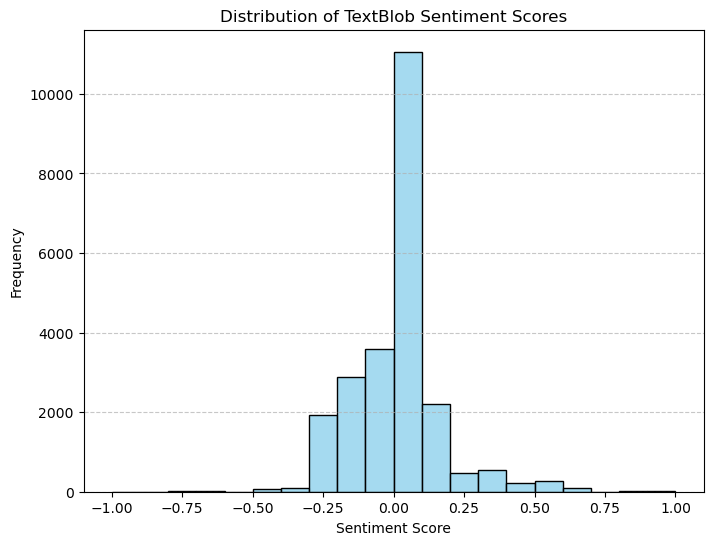

In [297]:
# Create a histogram for sentiment scores in df_textblob
plt.figure(figsize=(8, 6))
sns.histplot(df_textblob['TextBlob_Sentiment_Score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of TextBlob Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

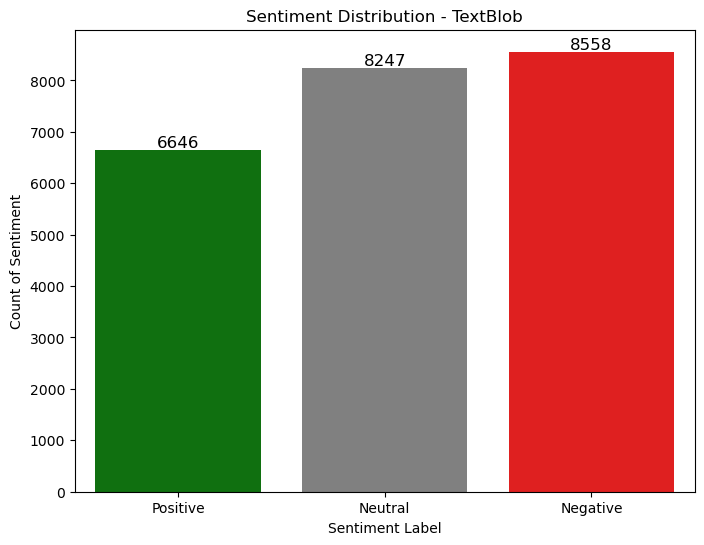

In [298]:
# Plot regarding the labels

# Count the occurrences of each sentiment label
sentiment_counts = df_textblob['TextBlob_Sentiment_Label'].value_counts()

# Define the order of sentiment categories
sentiment_order = ['Positive', 'Neutral', 'Negative']

# Define colors for the sentiment categories
colors = {'Positive': 'green', 'Neutral': 'gray', 'Negative': 'red'}

# Create a bar plot (histogram) for sentiment distribution with correct colors and order
plt.figure(figsize=(8, 6))
sns.set_palette([colors[s] for s in sentiment_order])
ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, order=sentiment_order)
plt.title('Sentiment Distribution - TextBlob')
plt.xlabel('Sentiment Label')
plt.ylabel('Count of Sentiment')

# Add labels with integer values of counts to the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

### 2nd Approach with NLTK (VADER)

In [299]:
used_approach = "NLTK_VADER" #setting it for later reference

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis and store the compound score in a new column
df_nltk['NLTK_Sentiment'] = df_nltk['Cleaned_Text'].apply(lambda text: sia.polarity_scores(text)['compound'])

In [300]:
# Apply sentiment analysis and store the compound score in a new column

# Record the start time
start_time = time.time()

for i, row in enumerate(df_nltk.index):
    text = df_nltk.at[row, 'Cleaned_Text']
    sentiment_score = sia.polarity_scores(text)['compound']
    df_nltk.at[row, 'NLTK_Sentiment'] = sentiment_score

    # Print progress message
    print(f"Text number {i + 1} out of all {total_rows} rows in the input file: Sentiment score = {sentiment_score}.")

# Calculate and print the elapsed time
end_time = time.time()
elapsed_time = end_time - start_time

print("-"*100)

Text number 1 out of all 23451 rows in the input file: Sentiment score = -0.4588.
Text number 2 out of all 23451 rows in the input file: Sentiment score = 0.2023.
Text number 3 out of all 23451 rows in the input file: Sentiment score = 0.0.
Text number 4 out of all 23451 rows in the input file: Sentiment score = 0.4019.
Text number 5 out of all 23451 rows in the input file: Sentiment score = -0.0516.
Text number 6 out of all 23451 rows in the input file: Sentiment score = 0.6249.
Text number 7 out of all 23451 rows in the input file: Sentiment score = 0.872.
Text number 8 out of all 23451 rows in the input file: Sentiment score = 0.4588.
Text number 9 out of all 23451 rows in the input file: Sentiment score = 0.4215.
Text number 10 out of all 23451 rows in the input file: Sentiment score = 0.0.
Text number 11 out of all 23451 rows in the input file: Sentiment score = 0.0.
Text number 12 out of all 23451 rows in the input file: Sentiment score = -0.4019.
Text number 13 out of all 23451 

In [301]:
# End information about the run
print(f"The used approach #2 was {used_approach}.")
print(f"Elapsed time: {elapsed_time:.0f} seconds.")

The used approach #2 was NLTK_VADER.
Elapsed time: 53.69 seconds.


In [302]:
# Saving the output in two file formats in dedicated files for only this current approach in the correct repository folder

# Save the results to an Excel file
excel_output_file_nltk = os.path.join(output_folder, 'sentiment_results_nltk.xlsx')
df_nltk.to_excel(excel_output_file_nltk, index=False)

# Save the results to a csv file with the same name
csv_output_file_nltk = os.path.join(output_folder, 'sentiment_results_nltk.csv')
df_nltk.to_csv(csv_output_file_nltk, index=False, encoding='utf-8', quoting=csv.QUOTE_ALL)

# Print final info
print(f"Results saved as {csv_output_file_nltk} and {excel_output_file_nltk}.")

Results saved as data/sentiment_results\sentiment_results_nltk.csv and data/sentiment_results\sentiment_results_nltk.xlsx.


### Explorative Analysis of NLTK (VADER)

In [303]:
# Calculate and print statistics for 'NLTK_Sentiment_Score' in df_nltk
print("Statistics for NLTK Sentiment Score:")

# Average Score
print("\nAverage Score:")
print(df_nltk['NLTK_Sentiment'].mean())

# Minimum Score
print("\nMinimum Score:")
print(df_nltk['NLTK_Sentiment'].min())

# Maximum Score
print("\nMaximum Score:")
print(df_nltk['NLTK_Sentiment'].max())

# Standard Deviation
print("\nStandard Deviation:")
print(df_nltk['NLTK_Sentiment'].std())

Statistics for NLTK Sentiment Score:

Average Score:
-0.04243490256279062

Minimum Score:
-0.9971

Maximum Score:
0.9999

Standard Deviation:
0.44859389093514546


In [304]:
# Check some results of NLTK (VADER)

# Sort the DataFrame by sentiment scores (positive to negative)
df_nltk_sorted = df_nltk.sort_values(by='NLTK_Sentiment', ascending=False)

# Select the 5 most positive entries
most_positive_entries = df_nltk_sorted.head(5)

# Select the 5 most negative entries
most_negative_entries = df_nltk_sorted.tail(5)

# Select 5 entries with exactly neutral scores (around 0)
neutral_entries = df_nltk_sorted[(df_nltk_sorted['NLTK_Sentiment'] >= -0.1) & (df_nltk_sorted['NLTK_Sentiment'] <= 0.1)].head(5)

# Concatenate the selected entries
selected_entries = pd.concat([most_positive_entries, most_negative_entries, neutral_entries])

# Display all columns for the selected entries
print(selected_entries)

            Unternehmen            Newstyp     Quelle Nearest_Date  \
4456      Deutsche Bank               News  EQS Group   2022-04-04   
17396     Deutsche Bank   Pressemitteilung  EQS Group   2023-03-30   
4321          Fresenius               News  EQS Group   2022-03-30   
4322          Fresenius               News  EQS Group   2022-03-31   
2975          Fresenius   Pressemitteilung    dpa-AFX   2022-02-22   
20321          Covestro  Pflichtmitteilung  EQS Group   2023-06-26   
20479          Covestro  Pflichtmitteilung  EQS Group   2023-06-29   
7392   Deutsche Telekom       Marktbericht    onvista   2022-06-29   
7389     Deutsche Börse       Marktbericht    onvista   2022-06-29   
7384      Deutsche Bank       Marktbericht    onvista   2022-06-29   
20380    Siemens Energy       Marktbericht    onvista   2023-06-28   
8459           Covestro               News    dpa-AFX   2022-08-01   
215    Volkswagen (Vz.)            Analyse    dpa-AFX   2021-10-21   
20379   Sartorius (V

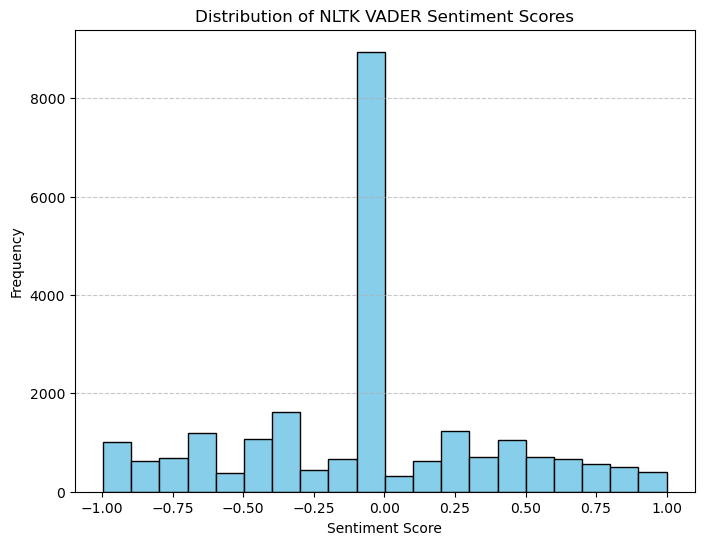

In [305]:
# Create a histogram to visualize the distribution of sentiment scores
plt.figure(figsize=(8, 6))
plt.hist(df_nltk['NLTK_Sentiment'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of NLTK VADER Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 3rd Approach with BERT

### Explorative Analysis of BERT